In [2]:
import matplotlib.pyplot as plt

# **ЛР 1**

In [3]:
ages = []
with open('moscow_2021.txt', 'r') as f:
    for l in f.readlines():
        ages.append(int(l.strip()))

## _Для дискретной оценки_

In [4]:
def mean(nums: list)-> float:
    sum=0
    for n in nums:
        sum+=n
    return sum/(len(nums))

def mean_sqr(nums: list) -> float:
    sum_sqr=0
    for n in nums:
        sum_sqr+=n**2
    return sum_sqr/len(nums)

def disperse(nums: list) -> float:
    nmean = mean(nums)
    nmean_sqr = mean_sqr(nums)
    return nmean_sqr-nmean**2

def stand_dev(nums):
    nums_dis = disperse(nums)
    return nums_dis**0.5

def coef_var(nums: list) -> float:
    nmean = mean(nums)
    nsdev = stand_dev(nums)
    return nsdev/nmean*100


def median(nums: list):
    amount = len(nums)
    nice_nums = sorted(nums)
    return nice_nums[amount//2] if amount%2==1 else (nice_nums[amount//2-1]+nice_nums[amount//2])/2

## _Для интервальной оценки_

In [5]:
def median_inter(freq_inter: list, shift: int, width: int) -> float:
    total = sum(freq_inter)
    s=0
    for i, f in enumerate(freq_inter):
        if s+f>total/2:
            break
        s+=f
    left_border = i*width+shift
    return left_border+width*(total/2-s)/f
def mode_inter(freq_inter: list, shift: int, width: int) -> float:
    ind_mode = freq_inter.index(max(freq_inter))
    next_to_mode = 0 if ind_mode==len(freq_inter)-1 else freq_inter[ind_mode+1]
    prev_to_mode = 0 if ind_mode==0 else freq_inter[ind_mode-1]
    left_border = ind_mode*width+shift
    return left_border+width*(freq_inter[ind_mode]-prev_to_mode)/((freq_inter[ind_mode]-prev_to_mode)+(freq_inter[ind_mode]-next_to_mode))
        

In [6]:
freq_array=[0]*60
for a in ages:
    freq_array[a-14]+=1

In [7]:
# 0 - [14-23)
# 1 - [23-32)
# 2 - [32-41)
# 3 - [41-50)
# 4 - [50-59)
# 5 - [59-68)
# 6 - [68-73)
freq_array_interval = [0]*7
for a in ages:
    freq_array_interval[(a-14)//9]+=1
freq_array_interval

[4811, 9476, 7243, 7951, 1140, 1472, 330]

## Дискретная оценка

In [8]:
print(f'age_mean = {mean(ages):.3f}')
print(f'age_disp = {disperse(ages):.3f}')
print(f'age_sd = {disperse(ages)**0.5:.3f}')
print(f'age_mode = {freq_array.index(max(freq_array))+14} with frequency {max(freq_array)}')
print(f'age_spread = {max(ages)-min(ages)}')
print(f'age_coef_var = {coef_var(ages):.3f}%')
print(f'median = {median(ages)}')

age_mean = 35.373
age_disp = 144.917
age_sd = 12.038
age_mode = 29 with frequency 1340
age_spread = 59
age_coef_var = 34.032%
median = 34


## Интервальная оценка

In [9]:
mean_inter = 1/len(ages)*sum([(2*i+9)/2*n for i, n in zip(range(14, 69, 9), freq_array_interval)])
disper_inter = 1/len(ages)*sum([((2*i+9)/2 - mean_inter)**2*n for i,n in zip(range(14, 69, 9), freq_array_interval)])

print(f'age_mean = {mean_inter:.3f}')
print(f'age_disp = {disper_inter:.3f}')
print(f'age_sko = {disper_inter**0.5:.3f}')
print(f'age_mode = {mode_inter(freq_array_interval, 14, 9):.3f} with frequency {max(freq_array_interval)}')
print(f'median = {median_inter(freq_array_interval, 14, 9):.3f}')

age_mean = 35.631
age_disp = 148.536
age_sko = 12.188
age_mode = 29.087 with frequency 9476
median = 34.391


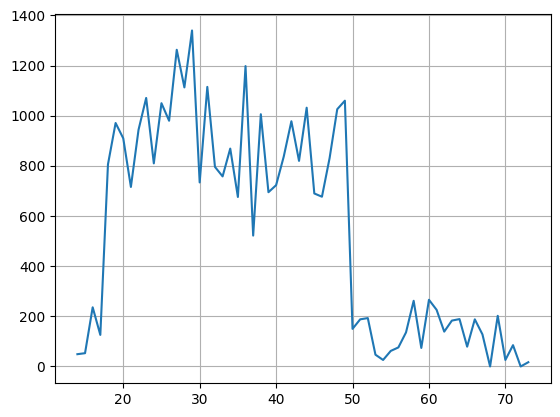

In [10]:
plt.plot(range(14, 74), freq_array)
plt.grid()

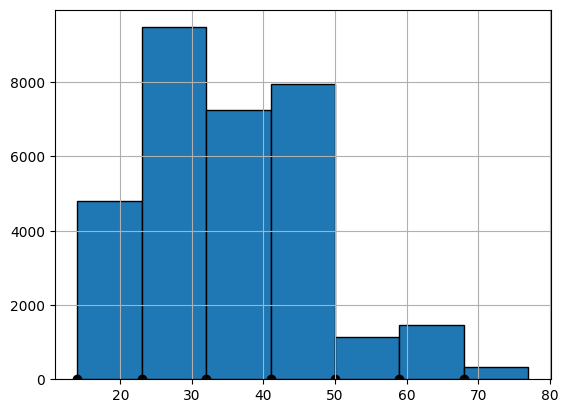

In [ ]:
val, weight = zip(*[(i*9+14, w) for i, w in enumerate(freq_array_interval)])
plt.bar(val, weight, width=9, edgecolor='black', align='edge')
plt.scatter(val, [0]*len(val), c='black')
plt.grid()